The step counting module, ported to python. There may still be a few bugs.

Note that this module is meant to take windows of data (roughly 256 samples) sampled at around 200Hz.

In [149]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import pandas as pd
import peakdetect
%matplotlib inline

In [179]:
# read in some data
filename = "C:\Users\owencb\Documents\CSSE491\Data\Ground_Truth_Treadmill2.csv"
data = pd.read_csv(filename,skiprows=[0,1],usecols=[5])
# data = np.arange(1,200)
data.head()
data = data.as_matrix()
data = data[182850:(182850+256*2)]

In [180]:
# break the time domain signal into 8-long windows
data = data - np.mean(data)
data = data[0:(len(data)-len(data)%8)] #disregard end samples
data = np.reshape(data,(-1,8))
energy = np.sum(np.square(data),axis=1)

In [181]:
enThreshold = 1.5*np.mean(energy)
for i in range(len(energy)):
    if energy[i]<enThreshold:
        energy[i] = 0
print enThreshold

0.100489529816


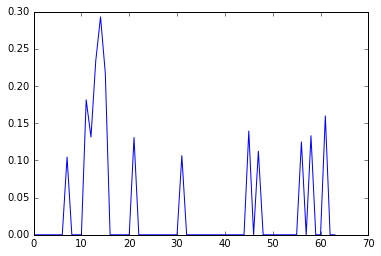

[  7.  14.  21.  31.  45.  47.  56.  58.  61.]
Total peaks:  9


In [182]:
#pkInds = signal.find_peaks_cwt(energy,np.arange(1,10))
# using enThreshold as delta in peakdet() is arbitrary
pkInds,o2 = peakdetect.peakdet(energy,enThreshold)
# yeah, this peak detection method needs to at least have the min distance capability
# potentially do this after the fact
plt.plot(energy)
plt.show()
print pkInds[:,0]
print "Total peaks: ",len(pkInds)

When using find_peaks_cwt : seems to work pretty well when like 256*10 samples (10 windows) of data are run through.  With two little data (e.g. 256 samples) it doesn't work, and with two many samples it doesn't work.  I think I might just need to look for a better peak finding algorithm.

When using peakdet(), min distance peak stuff needs to be added. 1mph doesn't work well without it.  Simply keep the largest peaks in an area?